## Reading and Processing the Handwritten Digits

In [9]:
%matplotlib inline
import binascii
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def showDigitImage(image):
    plt.axis('off')
    plt.imshow(image.reshape((28,28)), cmap=plt.cm.gray)
    plt.show()


In [3]:
try:
    trainingLabels = []

    with open("data/train-labels-idx1-ubyte", 'rb') as readTrainLabels:
    
        # reading in the magic number here
        readTrainLabels.read(4)
    
        # getting the number of labels in the file
        numLabels = int(binascii.hexlify(readTrainLabels.read(4)), 16)
    
        # making sure numLabels is equal to 60000
        assert(numLabels == 60000)
        
        for i in range(60000):
            trainingLabels.append(int(binascii.hexlify(readTrainLabels.read(1)), 16))
            
        trainingLabels = np.array(trainingLabels)
        print ("DONE READING TRAINING LABELS FROM FILES")
        
except:
    print("Got an error:", sys.exc_info()[0])
    raise

DONE READING TRAINING LABELS FROM FILES


In [4]:
trainingData = np.zeros((60000, 784))

with open("data/train-images-idx3-ubyte", 'rb') as readTrainData:
    
    # reading in the magic number here
    readTrainData.read(4)
    
    # getting the number of labels in the file
    numLabels = int(binascii.hexlify(readTrainData.read(4)), 16)
    
    # making sure data size is equal to 60000
    assert(numLabels == 60000)
        
    # getting the number of rows here
    readTrainData.read(4)
        
    # getting the number of columns here 
    readTrainData.read(4)
        
    index = 0
    pixelCount = 0
    for i in range(60000 * 28 * 28):
        if pixelCount == 784:
            pixelCount = 0
            index += 1
        
        trainingData[index][pixelCount] = int(binascii.hexlify(readTrainData.read(1)), 16)
        pixelCount += 1

    print ("DONE READING TRAINING IMAGES FROM FILES")
        

DONE READING TRAINING IMAGES FROM FILES


In [5]:
testLabels = []

with open("data/t10k-labels-idx1-ubyte", 'rb') as readTestLabels:
    
    # reading in the magic number here
    readTestLabels.read(4)
    
    # getting the number of labels in the file
    numLabels = int(binascii.hexlify(readTestLabels.read(4)), 16)
    
    # making sure numLabels is equal to 10000
    assert(numLabels == 10000)
        
    for i in range(10000):
        testLabels.append(int(binascii.hexlify(readTestLabels.read(1)), 16))
            
    testLabels = np.array(testLabels)
    print ("DONE READING TEST LABELS FROM FILES")

DONE READING TEST LABELS FROM FILES


In [6]:
testData = np.zeros((10000, 784))

with open("data/t10k-images-idx3-ubyte", 'rb') as readTestData:
    
    # reading in the magic number here
    readTestData.read(4)
    
    # getting the number of labels in the file
    numLabels = int(binascii.hexlify(readTestData.read(4)), 16)
    
    # making sure data size is equal to 10000
    assert(numLabels == 10000)
        
    # getting the number of rows here
    readTestData.read(4)
        
    # getting the number of columns here 
    readTestData.read(4)
        
    index = 0
    pixelCount = 0
    for i in range(10000 * 28 * 28):
        if pixelCount == 784:
            pixelCount = 0
            index += 1
        
        testData[index][pixelCount] = int(binascii.hexlify(readTestData.read(1)), 16)
        pixelCount += 1

    print ("DONE READING TEST IMAGES FROM FILES")
        

DONE READING TEST IMAGES FROM FILES


## Graphing the number of each digit in both training and test data

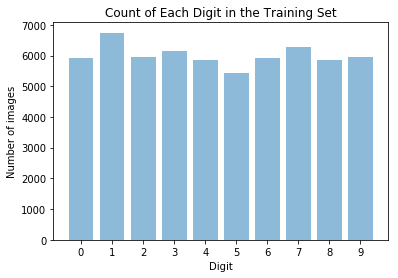

Total Number of Training Points: 60000

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [15]:
digits, counts = np.unique(trainingLabels, return_counts = True)

yAxis = np.arange(len(digits))

plt.bar(yAxis, counts, align='center', alpha=0.5)
plt.xticks(yAxis, digits)
plt.ylabel('Number of images')
plt.xlabel('Digit')
plt.title('Count of Each Digit in the Training Set')
plt.show()

print ("Total Number of Training Points: " + str(len(trainingLabels)) + "\n")
print(dict(zip(digits, counts)))

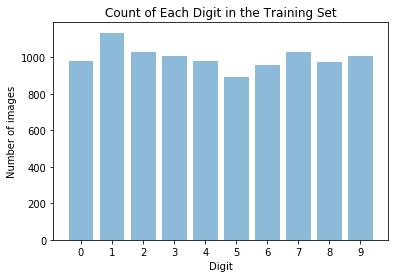

Total Number of Test Points: 10000

{0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [16]:
digits, counts = np.unique(testLabels, return_counts = True)

yAxis = np.arange(len(digits))

plt.bar(yAxis, counts, align='center', alpha=0.5)
plt.xticks(yAxis, digits)
plt.ylabel('Number of images')
plt.xlabel('Digit')
plt.title('Count of Each Digit in the Training Set')
plt.show()

print ("Total Number of Test Points: " + str(len(testLabels)) + "\n")
print(dict(zip(digits, counts)))

## Performing the KNN Algorithm Here (k = 1)